# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** Hanifa Febriana Putri
- **Email:** hanifa.22070@mhs.unesa.ac.id
- **ID Dicoding:** M284B4KX1712

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1 : Bagaimana pengaruh cuaca (weathersit) terhadap jumlah penyewaan sepeda selama tahun 2012?
- Pertanyaan 2 : Bagaimana pengaruh season terhadap jumlah penyewaan sepeda berdasarkan penyewa casual dan registered selama tahun 2012?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

## Data Wrangling

### Gathering Data

In [13]:
url ="https://raw.githubusercontent.com/hanifa91/Proyek-Analisis-Data/refs/heads/main/day.csv"
day_df = pd.read_csv(url, encoding='unicode_escape')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight:**
- Membaca file CSV dari URL Github
- Menampilkan lima baris pertama dari DataFrame day_df untuk memberi gambaran awal tentang struktur dan isi data, termasuk nama kolom dan beberapa nilai yang ada.

### Assessing Data

In [3]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


**Insight:**
- Dari informasi tersebut, terdapat kesalahan tipe data untuk kolom dteday. Kolom tersebut harusnya direpresentasikan sebagai tipe data datetime, bukan object(untuk tipe data string)  



In [4]:
print("Jumlah duplikasi: ",day_df.duplicated().sum())
day_df.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Insight:**
- Tidak terdapat duplikasi/baris yang sama
- Tidak ada keanehan pada seluruh data tersebut dan mendapatkan pemahaman awal tentang parameter statistik (mean,min,max dll) dari kolom numerik pada DataFrame day_df untuk membantu analisis lebih lanjut.

### Cleaning Data

In [5]:
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

**Insight:**
- Tipe data pada kolom dteday telah berubah menjadi datetime sehingga dapat digunakan dalam analisis yang melibatkan tanggal, seperti pengurutan, perhitungan interval waktu, atau visualisasi data waktu.

## Exploratory Data Analysis (EDA)

### Explore ...

In [6]:
# Memfilter data untuk tahun 2012
day_2012 = day_df[day_df['yr'] == 1]

day_2012.groupby(by="weathersit").agg({
    "cnt" :["max","min","mean"]
})

cnt                   
             max   min         mean
weathersit                         
1           8714  1529  6003.734177
2           8362   920  4991.333333
3           4639    22  2126.166667

**Insight:**

* Wethersit hanya dikelompokkan menjadi tiga karena nilai max wethersit yaitu empat, artinya tidak ada ada penyewa sepeda pada kondisi wethersit 4  
*  Kondisi cuaca cerah (wethersit 1) menunjukkan jumlah penyewaan sepeda yang paling tinggi, dengan rata-rata sekitar 6004 penyewaan.
*   Kondisi cuaca kabut (weathersit 2) juga menghasilkan jumlah penyewaan sepeda yang cukup tinggi, tetapi lebih rendah dibandingkan dengan kondisi cuaca cerah. Hal ini menunjukkan bahwa, meskipun masih ada penyewa sepeda,cuaca kurang ideal untuk menyewa sepeda sehingga bisa mengurangi jumlah penyewaan.
*   Kondisi cuaca buruk seperti hujan ringin (weathersit 3) menghasilkan jumlah penyewaan yang paling rendah, dengan rata-rata hanya 2126 penyewaan. Bahkan,pada kondisi hujan deras+es/salju (weathersit 4) tidak ada penyewa sepeda. Ini menunjukkan bahwa cuaca ekstrem memiliki dampak yang signifikan terhadap minat orang untuk menyewa sepeda.







In [7]:
day_2012.groupby(by="season").agg({
    "cnt" :["mean"]
})


,cnt
,mean
season,
1,3531.296703
2,6209.489130
3,6824.244681
4,5791.865169


**Insight:**
- Selama musim semi (season 1), jumlah penyewaan total berada pada tingkat terendah dibandingkan dengan musim lainnya. Hal ini bisa disebabkan oleh suhu yang mungkin masih dingin di awal musim atau berkurangnya aktivitas luar ruangan dibandingkan dengan musim panas.
- Musim panas (season 2) menunjukkan peningkatan yang signifikan dalam jumlah penyewaan total. Ini menunjukkan bahwa cuaca yang hangat dan lebih banyak kegiatan luar ruangan mendorong lebih banyak orang untuk menyewa sepeda.
- Musim gugur (season 3) memiliki jumlah penyewaan total tertinggi. Meskipun cuaca mulai mendingin, tampaknya penyewa sepeda ingin memanfaatkan waktu ini karena pemandangan yang indah dan aktivitas luar ruangan yang masih banyak dilakukan.
- Pada musim dingin (seosen 4), jumlah penyewaan total mengalami penurunan dari musim gugur tetapi masih lebih tinggi dibandingkan dengan musim semi. Ini menunjukkan bahwa meskipun cuaca dingin, masih ada cukup banyak penyewa sepeda.



## Visualization & Explanatory Analysis

### Pertanyaan 1:

<ipython-input-8-5ef9f8bb9bce>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='weathersit', y='cnt', data = agg_data1, palette= 'viridis')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping wi

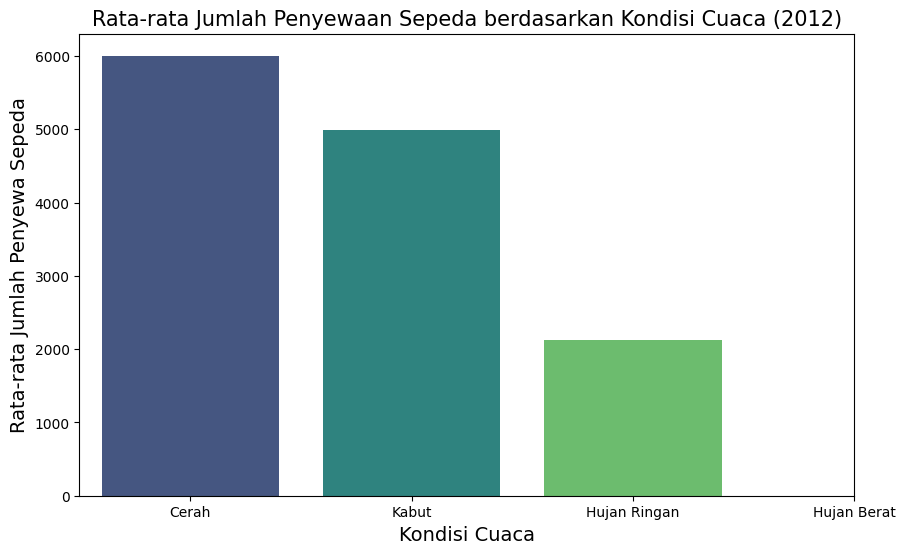

In [8]:
import seaborn as sns

# Mengelompokkan berdasarkan 'weathersit' dan menghitung rata-rata penyewaan sepeda
agg_data1 = day_2012.groupby(by="weathersit").agg({
    "cnt": "mean"
}).reset_index()


# Plotting Bar Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='weathersit', y='cnt', data = agg_data1, palette= 'viridis')
plt.title('Rata-rata Jumlah Penyewaan Sepeda berdasarkan Kondisi Cuaca (2012)',loc="center", fontsize=15)
plt.xlabel('Kondisi Cuaca', size =14)
plt.ylabel('Rata-rata Jumlah Penyewa Sepeda', size=14)
plt.xticks([0, 1, 2, 3], ['Cerah', 'Kabut', 'Hujan Ringan', 'Hujan Berat'])
plt.show()

**Insight:**

*   Berdasarkan visualisasi Bar Plot, menunjukkan bahwa rata - rata penyewaan sepeda terbanyak terjadi ketika kondisi cerah. Selain itu, juga terlihat bahwa rata - rata penyewaan sepeda semakin turun ketika kondisi cuaca semakin buruk.




### Pertanyaan 2:

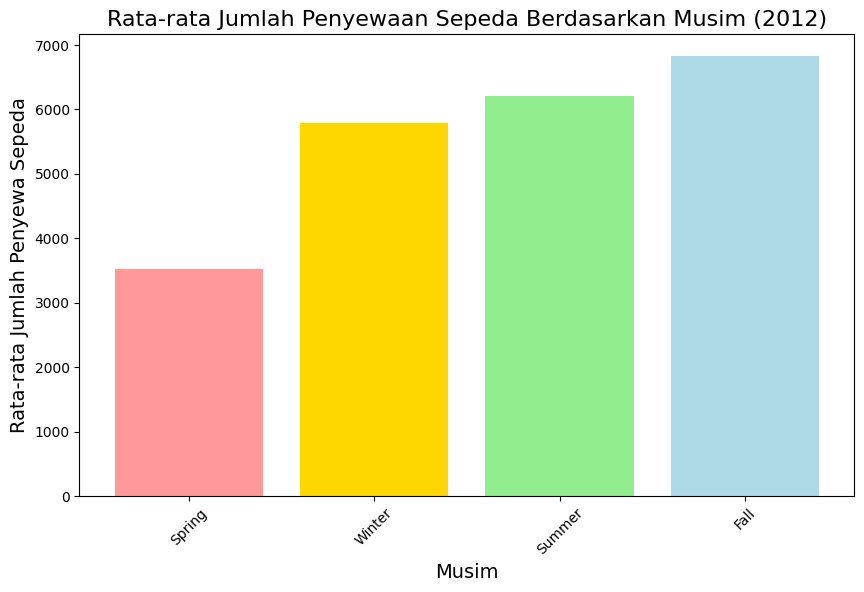

In [9]:
data = {
    'season': ['Spring', 'Summer', 'Fall', 'Winter'],
    'cnt_mean': [3531.296703, 6209.489130, 6824.244681, 5791.865169]
}

# Membuat DataFrame
df = pd.DataFrame(data)

df.sort_values(by='cnt_mean', inplace=True)

# Membuat bar plot
plt.figure(figsize=(10, 6))
plt.bar(df['season'], df['cnt_mean'], color=['#FF9999', '#FFD700', '#90EE90', '#ADD8E6'])
plt.title('Rata-rata Jumlah Penyewaan Sepeda Berdasarkan Musim (2012)', fontsize=16)
plt.xlabel('Musim', fontsize=14)
plt.ylabel('Rata-rata Jumlah Penyewa Sepeda', fontsize=14)
plt.xticks(rotation=45)  # Memutar label pada sumbu x agar lebih mudah dibaca

plt.show()


**Insight:**
-  Bar plot ini menunjukkan bahwa pola penyewaan sepeda sangat dipengaruhi oleh musim, dimana rata -rata jumlah penyewa paling tinggi ketika musim fall (gugur) sedangkan rata - rata jumlah penyewa paling sedikit pada musim spring (semi). Ini menunjukkan ada potensi untuk meningkatkan penggunaan sepeda di setiap musim dengan strategi yang tepat.

## Analisis Lanjutan (Opsional)

## Conclusion

- Conclution pertanyaan 1 : pengaruh cuaca (weathersit) menunjukkan bahwa kondisi cuaca memiliki dampak yang signifikan terhadap jumlah penyewaan sepeda, di mana kondisi cuaca yang lebih baik menghasilkan jumlah penyewaan yang lebih tinggi. Penyedia layanan penyewaan sepeda sebaiknya memanfaatkan informasi ini untuk mengoptimalkan layanan mereka dan meningkatkan pengalaman pengguna dengan memperhitungkan cuaca saat merencanakan aktivitas dan promosi. Seperti, meyediakan lebih banyak sepeda di lokasi yang strategis, khususnya ketika kondisi cuaca cerah dan melakukan promosi dengan memberikan potongan harga/fasilitas(mantel) ketika kondisi cuaca buruk.


- Conclution pertanyaan 2 : Data menunjukkan pola yang jelas dalam penyewaan sepeda berdasarkan musim. Musim gugur dan musim panas adalah waktu yang optimal untuk meningkatkan penyewaan, sementara musim semi dan musim dingin menawarkan peluang yang belum dimanfaatkan sepenuhnya. Dengan strategi pemasaran yang tepat dan program yang menarik, penyedia layanan sepeda dapat meningkatkan kesadaran dan penggunaan sepeda di semua musim.
